<a href="https://colab.research.google.com/github/User-2rxeg/NYC-CrashLens/blob/main/V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load crashes dataset
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD'
df_crashes = pd.read_csv(crashes_url, low_memory=False)



# Quick preview
df_crashes.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [3]:
# Load persons dataset
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
df_persons = pd.read_csv(persons_url, low_memory=False)

df_persons.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,...,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,...,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
2,10253177,4230550,10/26/2019,17:55,ae48c136-1383-45db-83f4-2a5eecfb7cff,Occupant,Unspecified,19143133.0,55.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
3,6650180,3565527,11/21/2016,13:05,2782525,Occupant,Unspecified,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,NaN
4,10255516,4231168,10/25/2019,11:16,e038e18f-40fb-4471-99cf-345eae36e064,Occupant,Unspecified,19144329.0,7.0,Not Ejected,...,Does Not Apply,Right rear passenger or motorcycle sidecar pas...,Lap Belt,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [4]:
print("Crashes Dataset Structure:")
df_crashes.info()
df_crashes.shape

print("\nPersons Dataset Structure:")
df_persons.info()
df_persons.shape


Crashes Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218631 entries, 0 to 2218630
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST 

(5813820, 21)

In [5]:
# Count missing values in each dataset
print("Missing values in Crashes dataset:")
print(df_crashes.isna().sum().sort_values(ascending=False).head(15))

print("\nMissing values in Persons dataset:")
print(df_persons.isna().sum().sort_values(ascending=False).head(15))


Missing values in Crashes dataset:
VEHICLE TYPE CODE 5              2208911
CONTRIBUTING FACTOR VEHICLE 5    2208595
VEHICLE TYPE CODE 4              2183315
CONTRIBUTING FACTOR VEHICLE 4    2181987
VEHICLE TYPE CODE 3              2064345
CONTRIBUTING FACTOR VEHICLE 3    2058119
OFF STREET NAME                  1827925
CROSS STREET NAME                 847707
ZIP CODE                          680182
BOROUGH                           679907
ON STREET NAME                    483080
VEHICLE TYPE CODE 2               444749
CONTRIBUTING FACTOR VEHICLE 2     355979
LOCATION                          240341
LATITUDE                          240341
dtype: int64

Missing values in Persons dataset:
CONTRIBUTING_FACTOR_2    5713250
CONTRIBUTING_FACTOR_1    5713118
PED_ACTION               5711840
PED_LOCATION             5711739
SAFETY_EQUIPMENT         3027045
EJECTION                 2824676
POSITION_IN_VEHICLE      2824219
EMOTIONAL_STATUS         2727936
BODILY_INJURY            2727893
COMP

In [6]:
df_persons.describe()


,UNIQUE_ID,COLLISION_ID,VEHICLE_ID,PERSON_AGE
count,5.813820e+06,5.813820e+06,5.572803e+06,5.164747e+06
mean,9.370330e+06,4.015355e+06,1.870136e+07,3.751295e+01
std,2.760182e+06,6.646730e+05,1.620275e+06,1.111215e+02
min,1.092200e+04,3.700000e+01,1.234230e+05,-9.990000e+02
25%,7.097060e+06,3.705050e+06,1.759950e+07,2.400000e+01
50%,9.569806e+06,4.059670e+06,1.880526e+07,3.600000e+01
75%,1.187911e+07,4.437680e+06,2.001491e+07,5.100000e+01
max,1.352676e+07,4.855413e+06,2.096524e+07,9.999000e+03


In [7]:
df_crashes.describe()


,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.978290e+06,1.978290e+06,2.218613e+06,2.218600e+06,2.218631e+06,2.218631e+06,2.218631e+06,2.218631e+06,2.218631e+06,2.218631e+06,2.218631e+06
mean,4.059071e+01,-7.368484e+01,3.280716e-01,1.585685e-03,5.955384e-02,7.842674e-04,2.915942e-02,1.262040e-04,2.347240e-01,6.454431e-04,3.264448e+06
std,2.326301e+00,4.324753e+00,7.148684e-01,4.206870e-02,2.499738e-01,2.863060e-02,1.705230e-01,1.127340e-02,6.760237e-01,2.778727e-02,1.509503e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066734e+01,-7.397453e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.190778e+06
50%,4.072032e+01,-7.392676e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.745607e+06
75%,4.076956e+01,-7.386657e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.300480e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.855413e+06


In [8]:
duplicates_crashes = df_crashes.duplicated(subset=["COLLISION_ID"]).sum()
duplicates_persons = df_persons.duplicated(subset=["COLLISION_ID"]).sum()

print("Duplicate collision IDs in crashes:", duplicates_crashes)
print("Duplicate collision IDs in persons:", duplicates_persons)


Duplicate collision IDs in crashes: 0
Duplicate collision IDs in persons: 4225190


In [9]:
#  Standardize formats Date:
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce')
df_crashes['YEAR'] = df_crashes['CRASH DATE'].dt.year


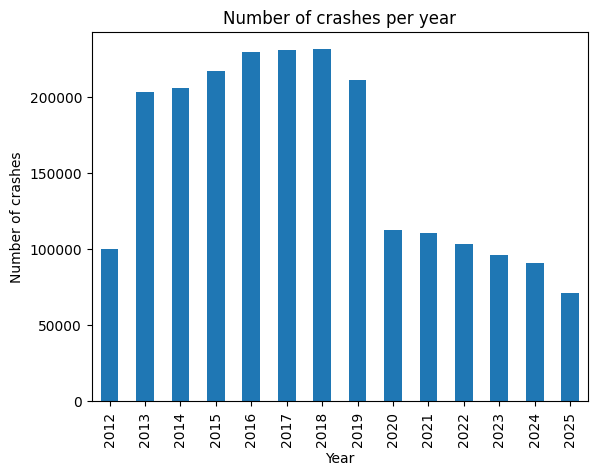

In [10]:
import matplotlib.pyplot as plt

df_crashes['YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of crashes per year")
plt.xlabel("Year")
plt.ylabel("Number of crashes")
plt.show()


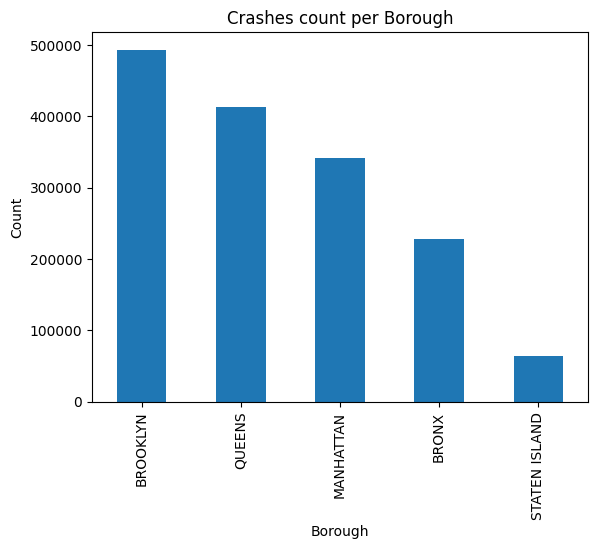

In [11]:
df_crashes['BOROUGH'].value_counts().plot(kind='bar')
plt.title("Crashes count per Borough")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.show()


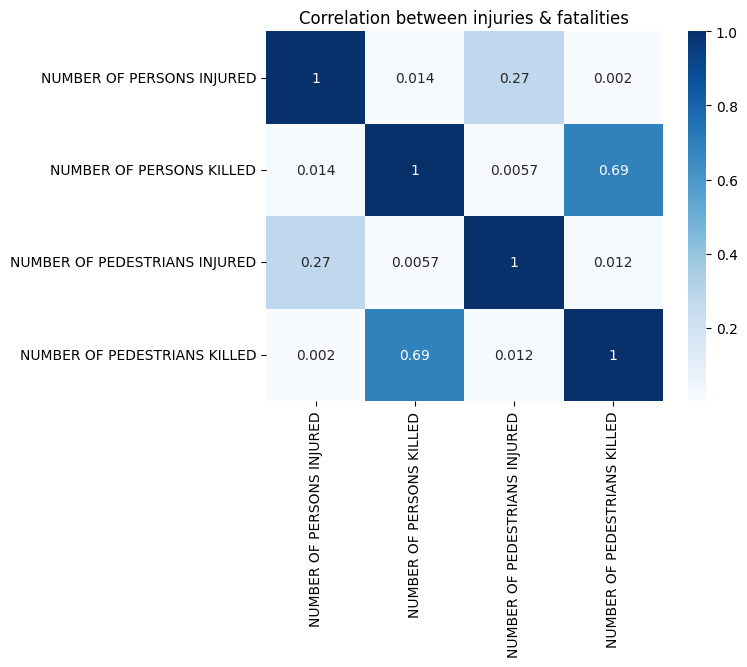

In [12]:
import seaborn as sns

sns.heatmap(df_crashes[['NUMBER OF PERSONS INJURED',
                        'NUMBER OF PERSONS KILLED',
                        'NUMBER OF PEDESTRIANS INJURED',
                        'NUMBER OF PEDESTRIANS KILLED']].corr(),
            annot=True, cmap='Blues')
plt.title("Correlation between injuries & fatalities")
plt.show()


In [13]:
# ✅ 1) Standardize Column Names
# -----------------------------
df_crashes.columns = df_crashes.columns.str.replace(' ', '_')
df_persons.columns = df_persons.columns.str.replace(' ', '_')

In [14]:
string_cols_crashes = [
    'BOROUGH',
    'CONTRIBUTING FACTOR VEHICLE 1',
    'VEHICLE TYPE CODE 1'
]


for col in string_cols_crashes:
    if col in df_crashes.columns:
        df_crashes[col] = df_crashes[col].astype(str).str.upper().str.strip()


In [15]:
string_cols_persons = [
    'PERSON_TYPE',
    'PERSON_INJURY',
    'PERSON_SEX',
    'CONTRIBUTING_FACTOR_1',
    'CONTRIBUTING_FACTOR_2'
]

for col in string_cols_persons:
    if col in df_persons.columns:
        df_persons[col] = df_persons[col].astype(str).str.upper().str.strip()

In [16]:
categorical_cols_crashes = [
    'BOROUGH',
    'CONTRIBUTING FACTOR VEHICLE 1',
    'VEHICLE TYPE CODE 1'
]

for col in categorical_cols_crashes:
    if col in df_crashes.columns:
        df_crashes[col] = df_crashes[col].astype('category')


In [17]:
categorical_cols_persons = [
    'PERSON_TYPE',
    'PERSON_INJURY',
    'PERSON_SEX',
    'CONTRIBUTING_FACTOR_1'
]

for col in categorical_cols_persons:
    if col in df_persons.columns:
        df_persons[col] = df_persons[col].astype('category')


In [18]:
print(" Crashes dataset — Before removing duplicates:", len(df_crashes))

df_crashes = df_crashes.drop_duplicates(subset=["COLLISION_ID"])

print(" Crashes dataset — After removing duplicates:", len(df_crashes))


 Crashes dataset — Before removing duplicates: 2218631
 Crashes dataset — After removing duplicates: 2218631


In [19]:
print("Persons dataset — before removing duplicates:", len(df_persons))
df_persons = df_persons.drop_duplicates(subset=["COLLISION_ID"])
print("Persons dataset — after removing duplicates:", len(df_persons))

Persons dataset — before removing duplicates: 5813820
Persons dataset — after removing duplicates: 1588630


## Verification: Outlier Check (Statistical - IQR Method)

This section performs a statistical check for outliers using the Interquartile Range (IQR) method for all numerical columns in both `df_crashes` and `df_persons`. This is a general statistical method that identifies values falling significantly outside the typical range, and may include both genuinely erroneous data points and valid but extreme observations.

It's important to differentiate this from our previous *domain-rule-based* outlier handling, which specifically targeted clearly impossible values (e.g., negative ages, coordinates outside NYC bounds) rather than just statistically unusual ones. This verification step helps confirm if other types of statistical outliers exist that might warrant further investigation.

In [33]:
import numpy as np

print("### Statistical Outlier Check (IQR Method) ###")

def find_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

# Check df_crashes for outliers
print("\n--- df_crashes Outliers (IQR) ---")
for col in df_crashes.select_dtypes(include=np.number).columns:
    # Exclude IDs and all-NaN columns, and specific columns we already handled by domain rules if not already part of the general numeric selection.
    # Note: LATITUDE/LONGITUDE will still be checked by IQR, but we've already handled the most egregious errors.
    if col not in ['COLLISION_ID'] and not df_crashes[col].isnull().all():
        num_outliers = find_iqr_outliers(df_crashes, col)
        if num_outliers > 0:
            print(f"Column '{col}': {num_outliers} outliers detected")

# Check df_persons for outliers
print("\n--- df_persons Outliers (IQR) ---")
for col in df_persons.select_dtypes(include=np.number).columns:
    # Exclude IDs and all-NaN columns
    if col not in ['UNIQUE_ID', 'COLLISION_ID', 'VEHICLE_ID'] and not df_persons[col].isnull().all():
        num_outliers = find_iqr_outliers(df_persons, col)
        if num_outliers > 0:
            print(f"Column '{col}': {num_outliers} outliers detected")


### Statistical Outlier Check (IQR Method) ###

--- df_crashes Outliers (IQR) ---
Column 'LATITUDE': 1549 outliers detected
Column 'LONGITUDE': 44060 outliers detected
Column 'NUMBER_OF_PERSONS_INJURED': 537308 outliers detected
Column 'NUMBER_OF_PERSONS_KILLED': 3371 outliers detected
Column 'NUMBER_OF_PEDESTRIANS_INJURED': 126682 outliers detected
Column 'NUMBER_OF_PEDESTRIANS_KILLED': 1714 outliers detected
Column 'NUMBER_OF_CYCLIST_INJURED': 63869 outliers detected
Column 'NUMBER_OF_CYCLIST_KILLED': 279 outliers detected
Column 'NUMBER_OF_MOTORIST_INJURED': 340511 outliers detected
Column 'NUMBER_OF_MOTORIST_KILLED': 1322 outliers detected

--- df_persons Outliers (IQR) ---


## Verification: Missing Values Re-check

This section re-checks the count and percentage of missing values for all columns in both `df_crashes` and `df_persons` after the cleaning steps. This serves as a final verification that the missing value handling was applied correctly and to identify any remaining missing data that was intentionally left as `NaN`.

In [35]:
# Handling outliers in df_persons['PERSON_AGE']
df_persons['PERSON_AGE'] = df_persons['PERSON_AGE'].apply(lambda x: x if pd.isna(x) or (0 <= x <= 100) else pd.NA)

# Handling outliers in df_crashes['LATITUDE'] and df_crashes['LONGITUDE']
# Approximate NYC bounds
min_lat, max_lat = 40.5, 40.9
min_lon, max_lon = -74.25, -73.7

df_crashes.loc[(df_crashes['LATITUDE'] == 0) |
               (df_crashes['LATITUDE'] < min_lat) |
               (df_crashes['LATITUDE'] > max_lat), 'LATITUDE'] = pd.NA

df_crashes.loc[(df_crashes['LONGITUDE'] == 0) |
               (df_crashes['LONGITUDE'] < min_lon) |
               (df_crashes['LONGITUDE'] > max_lon), 'LONGITUDE'] = pd.NA

print("Outlier handling complete for PERSON_AGE, LATITUDE, and LONGITUDE.")

Outlier handling complete for PERSON_AGE, LATITUDE, and LONGITUDE.


In [28]:
print("### Missing Values Re-check ###")

print("\n--- df_crashes Missing Values (Post-Cleaning) ---")
missing_crashes = df_crashes.isna().sum()
missing_crashes = missing_crashes[missing_crashes > 0].sort_values(ascending=False)
missing_crashes_percent = (missing_crashes / len(df_crashes)) * 100
if not missing_crashes.empty:
    missing_crashes_df = pd.DataFrame({'Missing Count': missing_crashes, 'Missing Percent': missing_crashes_percent.round(2)})
    display(missing_crashes_df)
else:
    print("No missing values in df_crashes.")

print("\n--- df_persons Missing Values (Post-Cleaning) ---")
missing_persons = df_persons.isna().sum()
missing_persons = missing_persons[missing_persons > 0].sort_values(ascending=False)
missing_persons_percent = (missing_persons / len(df_persons)) * 100
if not missing_persons.empty:
    missing_persons_df = pd.DataFrame({'Missing Count': missing_persons, 'Missing Percent': missing_persons_percent.round(2)})
    display(missing_persons_df)
else:
    print("No missing values in df_persons.")


### Missing Values Re-check ###

--- df_crashes Missing Values (Post-Cleaning) ---


,Missing Count,Missing Percent
VEHICLE_TYPE_CODE_5,2208911,99.56
CONTRIBUTING_FACTOR_VEHICLE_5,2208595,99.55
VEHICLE_TYPE_CODE_4,2183315,98.41
CONTRIBUTING_FACTOR_VEHICLE_4,2181987,98.35
VEHICLE_TYPE_CODE_3,2064345,93.05
CONTRIBUTING_FACTOR_VEHICLE_3,2058119,92.77
OFF_STREET_NAME,1827925,82.39
CROSS_STREET_NAME,847707,38.21
ZIP_CODE,680182,30.66
ON_STREET_NAME,483080,21.77



--- df_persons Missing Values (Post-Cleaning) ---


,Missing Count,Missing Percent
PED_ACTION,1540765,96.99
PED_LOCATION,1540713,96.98
SAFETY_EQUIPMENT,975884,61.43
EJECTION,917608,57.76
POSITION_IN_VEHICLE,917438,57.75
EMOTIONAL_STATUS,872578,54.93
BODILY_INJURY,872541,54.92
COMPLAINT,872537,54.92
PERSON_AGE,188857,11.89
PED_ROLE,142800,8.99


## Task: Outlier Handling

For `PERSON_AGE` in `df_persons`, outliers were identified as values less than 0 or greater than 100, as these are biologically impossible or highly improbable. These values were replaced with `pd.NA`.

For `LATITUDE` and `LONGITUDE` in `df_crashes`, outliers were defined as values of 0 or coordinates falling outside the approximate geographical bounds of New York City. This approach uses domain-specific knowledge to identify erroneous entries rather than statistical methods like IQR, which might misinterpret valid extreme coordinates as outliers or fail to capture clearly incorrect values like 0.


## Task: Missing Value Handling

**For `df_crashes`:**

-   **Imputation (Mode):** For `VEHICLE_TYPE_CODE_1` and `CONTRIBUTING_FACTOR_VEHICLE_1`, missing values were imputed with the mode. These columns had a relatively small percentage of missing data (less than 1%), making mode imputation a reasonable strategy to preserve records without significantly distorting the distribution.
-   **Imputation (Zero):** For `NUMBER_OF_PERSONS_INJURED` and `NUMBER_OF_PERSONS_KILLED`, missing values were imputed with `0`. As these are count columns, a missing value is often indicative of zero occurrences, especially when the missing percentage is very low.
-   **Leaving as NaN:** Columns with a very high percentage of missing values (e.g., `VEHICLE_TYPE_CODE_X` for X=2,3,4,5, `CONTRIBUTING_FACTOR_VEHICLE_X` for X=2,3,4,5, `OFF_STREET_NAME`, `CROSS_STREET_NAME`, `ZIP_CODE`, `BOROUGH`, `ON_STREET_NAME`, `LOCATION`, `LATITUDE`, `LONGITUDE`) were left as `NaN`. Imputing these would be highly speculative and could introduce significant bias or inaccurate information, given the large proportion of missing entries. Dropping these rows would result in a substantial loss of valuable data.

**For `df_persons`:**

-   **Dropping Rows:** Rows with missing `PERSON_ID` were dropped. `PERSON_ID` is a unique identifier, and only 2 rows out of millions were missing this crucial piece of information. These rows were likely corrupted, and dropping them had a negligible impact on the dataset size.
-   **Leaving as NaN:** For other columns with high percentages of missing values (e.g., `PED_ACTION`, `PED_LOCATION`, `SAFETY_EQUIPMENT`, `EJECTION`, `POSITION_IN_VEHICLE`, `EMOTIONAL_STATUS`, `BODILY_INJURY`, `COMPLAINT`, `PED_ROLE`, `PERSON_AGE`, `VEHICLE_ID`), values were left as `NaN`. Many of these fields are descriptive details that are often not recorded if they are not applicable or unknown. Imputing these without strong domain expertise or a more sophisticated approach could lead to incorrect assumptions and bias in the data. Leaving them as `NaN` is the most conservative approach to avoid introducing erroneous information.

In [26]:
# --- Handling Missing Values in df_crashes ---

for col in ['VEHICLE_TYPE_CODE_1', 'CONTRIBUTING_FACTOR_VEHICLE_1']:
    if col in df_crashes.columns:
        mode_value = df_crashes[col].mode()[0]
        df_crashes[col].fillna(mode_value, inplace=True)


for col in ['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED']:
    if col in df_crashes.columns:
        df_crashes[col].fillna(0, inplace=True)


print("Missing values handled for df_crashes (mode imputation for specific categoricals, 0 imputation for counts).")

# --- Handling Missing Values in df_persons ---

df_persons.dropna(subset=['PERSON_ID'], inplace=True)



print("Missing values handled for df_persons (rows with missing PERSON_ID dropped).")


# Display remaining missing values to verify
print("\nRemaining Missing values in Crashes dataset:")
print(df_crashes.isna().sum().sort_values(ascending=False).head(20))

print("\nRemaining Missing values in Persons dataset:")
print(df_persons.isna().sum().sort_values(ascending=False).head(20))

/tmp/ipython-input-3063747379.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_crashes[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-3063747379.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Missing values handled for df_crashes (mode imputation for specific categoricals, 0 imputation for counts).
Missing values handled for df_persons (rows with missing PERSON_ID dropped).

Remaining Missing values in Crashes dataset:
VEHICLE_TYPE_CODE_5              2208911
CONTRIBUTING_FACTOR_VEHICLE_5    2208595
VEHICLE_TYPE_CODE_4              2183315
CONTRIBUTING_FACTOR_VEHICLE_4    2181987
VEHICLE_TYPE_CODE_3              2064345
CONTRIBUTING_FACTOR_VEHICLE_3    2058119
OFF_STREET_NAME                  1827925
CROSS_STREET_NAME                 847707
ZIP_CODE                          680182
ON_STREET_NAME                    483080
VEHICLE_TYPE_CODE_2               444749
CONTRIBUTING_FACTOR_VEHICLE_2     355979
LATITUDE                          252102
LONGITUDE                         247062
LOCATION                          240341
NUMBER_OF_PEDESTRIANS_KILLED           0
NUMBER_OF_PERSONS_KILLED               0
NUMBER_OF_PEDESTRIANS_INJURED          0
CRASH_TIME                     

In [20]:
print("Missing values in Crashes dataset:")
print(df_crashes.isna().sum().sort_values(ascending=False).head(20))

print("\nMissing values in Persons dataset:")
print(df_persons.isna().sum().sort_values(ascending=False).head(20))

Missing values in Crashes dataset:
VEHICLE_TYPE_CODE_5              2208911
CONTRIBUTING_FACTOR_VEHICLE_5    2208595
VEHICLE_TYPE_CODE_4              2183315
CONTRIBUTING_FACTOR_VEHICLE_4    2181987
VEHICLE_TYPE_CODE_3              2064345
CONTRIBUTING_FACTOR_VEHICLE_3    2058119
OFF_STREET_NAME                  1827925
CROSS_STREET_NAME                 847707
ZIP_CODE                          680182
ON_STREET_NAME                    483080
VEHICLE_TYPE_CODE_2               444749
CONTRIBUTING_FACTOR_VEHICLE_2     355979
LONGITUDE                         240341
LATITUDE                          240341
LOCATION                          240341
VEHICLE_TYPE_CODE_1                16122
CONTRIBUTING_FACTOR_VEHICLE_1       7825
NUMBER_OF_PERSONS_KILLED              31
NUMBER_OF_PERSONS_INJURED             18
CRASH_DATE                             0
dtype: int64

Missing values in Persons dataset:
PED_ACTION               1540766
PED_LOCATION             1540714
SAFETY_EQUIPMENT          9758